<a href="https://colab.research.google.com/github/Betaperson/Document-Topic-Modeller/blob/main/topicmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/huggingface/transformers
!pip install sentencepiece

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-5fycctqq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-5fycctqq
  Resolved https://github.com/huggingface/transformers to commit b257c46a075419c09e5ce5c5aa39bc346ecdb9a5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.32.0.dev0-py3-none-any.whl size=7405831 sha256=1c47fcb78b97c127bacb5385e7cf8d9574501b40f6dd858907cacc216918926f
  Stored in directory: /tmp/pip-ephem-wheel-cache-psfl_x_p/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully

In [ ]:
import requests
import torch
from transformers import T5ForConditionalGeneration,T5Tokenizer

API_TOKEN = "{Replace with Inference API Token}"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = T5ForConditionalGeneration.from_pretrained("Michau/t5-base-en-generate-headline")
tokenizer = T5Tokenizer.from_pretrained("Michau/t5-base-en-generate-headline")
model = model.to(device)

In [ ]:
article = input('Enter: ')

text =  "headline: " + article

max_len = 256

encoding = tokenizer.encode_plus(text, return_tensors = "pt")
input_ids = encoding["input_ids"].to(device)
attention_masks = encoding["attention_mask"].to(device)

beam_outputs = model.generate(
    input_ids = input_ids,
    attention_mask = attention_masks,
    max_length = 64,
    num_beams = 3,
    early_stopping = True,
)

result = tokenizer.decode(beam_outputs[0])

API_URL = "https://api-inference.huggingface.co/models/jonaskoenig/topic_classification_04"
headers = {"Authorization": "Bearer {}".format(API_TOKEN)}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

output = query({
	"inputs": result,
})

print(output)


Enter: Harvard College and the University of North Carolina (UNC) are two of the oldest institutions of higher learning in the United States. Every year, tens of thousands of students apply to each school; many fewer are admitted. Both Harvard and UNC employ a highly selective ad- missions process to make their decisions. Admission to each school can depend on a student’s grades, recommendation letters, or extracurric- ular involvement. It can also depend on their race. The question pre- sented is whether the admissions systems used by Harvard College and UNC are lawful under the Equal Protection Clause of the Four- teenth Amendment. At Harvard, each application for admission is initially screened by a “first reader,” who assigns a numerical score in each of six categories: academic, extracurricular, athletic, school support, personal, and over- all. For the “overall” category—a composite of the five other ratings— a first reader can and does consider the applicant’s race. Harvard’s ad

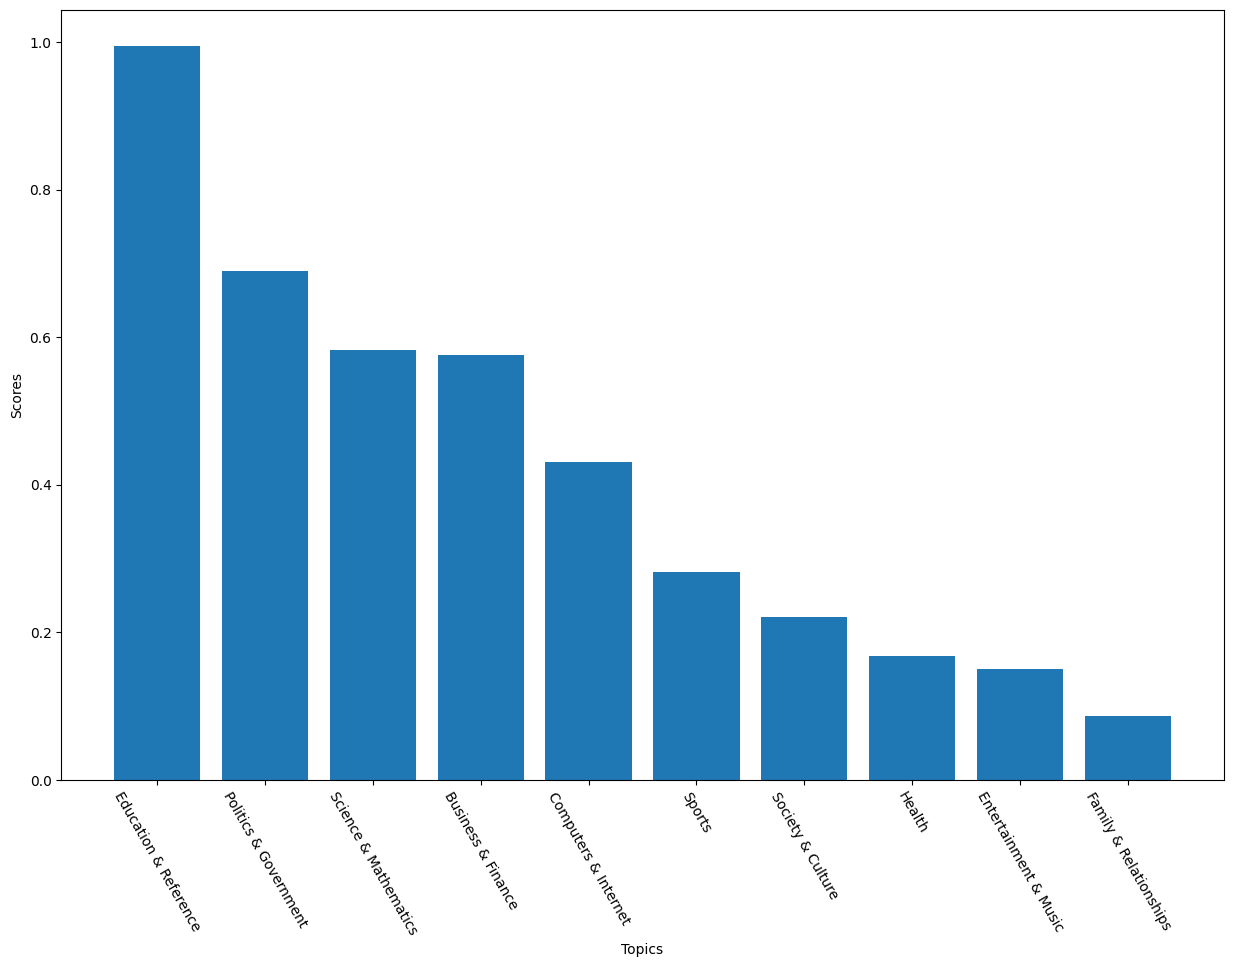

In [ ]:
import matplotlib.pyplot as plt
x = []
y = []
for topic in output[0]:
  x.append(topic['label'])
  y.append(topic['score'])

plt.figure(figsize=(15,10))
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 300)
plt.xlabel('Topics')
plt.ylabel('Scores')
plt.bar(x, y)

plt.show()